In [1]:
import pandas as pd

# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def preprocess_data(data):
    # Fill missing values for 'Age' and 'Fare' with median
    imputer = SimpleImputer(strategy='median')
    data['Age'] = imputer.fit_transform(data[['Age']])
    data['Fare'] = imputer.fit_transform(data[['Fare']])
    
    # Encode categorical data: 'Sex' and 'Embarked'
    encoder = LabelEncoder()
    data['Sex'] = encoder.fit_transform(data['Sex'])
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
    data['Embarked'] = encoder.fit_transform(data['Embarked'])
    
    # Selecting features for the model
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
    if 'Survived' in data.columns:
        return data[features], data['Survived']
    return data[features]

X_train, y_train = preprocess_data(train_data)
X_test = preprocess_data(test_data)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=600)

# Support Vector Machine
svm = SVC()

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Prepare a Stratified K-Fold to maintain ratio of classes in each fold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize models list
models = [
    (decision_tree, 'Decision Tree'),
    (random_forest, 'Random Forest'),
    (logreg, 'Logistic Regression'),
    (svm, 'SVM'),
    (knn, 'KNN')
]

metrics = [accuracy_score, precision_score, recall_score, f1_score]

def evaluate_models_by_metric(models, X, y, metrics):
    results = []
    detailed_results = {metric.__name__: [] for metric in metrics}
    
    for model, name in models:
        model_results = {'Model': name}
        for metric in metrics:
            score = cross_val_score(model, X, y, cv=skf, scoring=make_scorer(metric))
            model_results[metric.__name__] = score.mean()
            results.append({'Model': name, 'Metric': metric.__name__, 'Score': score.mean()})
        
        for metric_name in detailed_results:
            detailed_results[metric_name].append(model_results)

    for metric_name, data in detailed_results.items():
        print(f"\n--- {metric_name.upper()} ---")
        for result in data:
            print(f"{result['Model']} Average {metric_name}: {result[metric_name]:.5f}")

    return pd.DataFrame(results)

# Usage
results_df = evaluate_models_by_metric(models, X_train, y_train, metrics)


--- ACCURACY_SCORE ---
Decision Tree Average accuracy_score: 0.79011
Random Forest Average accuracy_score: 0.81928
Logistic Regression Average accuracy_score: 0.79352
SVM Average accuracy_score: 0.67787
KNN Average accuracy_score: 0.73063

--- PRECISION_SCORE ---
Decision Tree Average precision_score: 0.72283
Random Forest Average precision_score: 0.77496
Logistic Regression Average precision_score: 0.74442
SVM Average precision_score: 0.68438
KNN Average precision_score: 0.66512

--- RECALL_SCORE ---
Decision Tree Average recall_score: 0.73112
Random Forest Average recall_score: 0.74855
Logistic Regression Average recall_score: 0.70742
SVM Average recall_score: 0.30115
KNN Average recall_score: 0.59936

--- F1_SCORE ---
Decision Tree Average f1_score: 0.71976
Random Forest Average f1_score: 0.76083
Logistic Regression Average f1_score: 0.72435
SVM Average f1_score: 0.41718
KNN Average f1_score: 0.63049


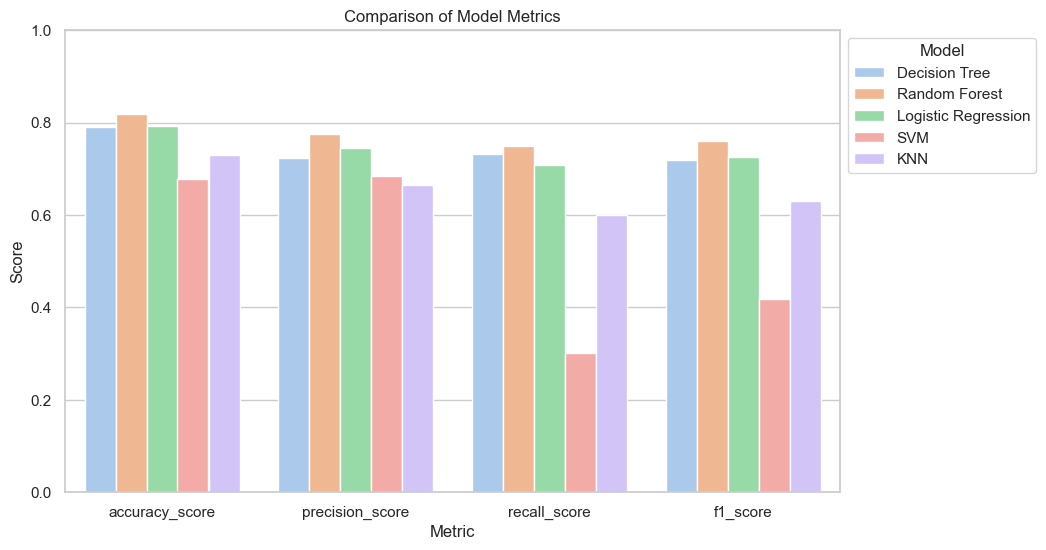

In [ ]:
import seaborn as sns

def plot_results(results_df):
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.figure(figsize=(10, 6))
    plot = sns.barplot(x="Metric", y="Score", hue="Model", data=results_df)
    plot.set_title('Comparison of Model Metrics')
    plot.set_ylim(0, 1)
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

plot_results(results_df)